In [1]:
import cv2
 
font = cv2.FONT_ITALIC
 
def faceDetect():
    eye_detect = False
    face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")  # 얼굴찾기 haar 파일
    eye_cascade = cv2.CascadeClassifier("./haarcascade_eye.xml") # 눈찾기 haar 파일
    i=0
    try:
        cam = cv2.VideoCapture(0)
    except:
        print("camera loading error")
        return
 
    while True:
        ret, frame = cam.read()
       # print(ret, frame.shape)
        if not ret:
            break
 
        if eye_detect:
            info = "Eye Detention ON"
        else:
            info = "Eye Detection OFF"
 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3, 5)
 
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
        #카메라 영상 왼쪽위에 위에 셋팅된 info 의 내용 출력
        cv2.putText(frame, info, (5,15), font, 0.5, (255,0, 255),1)
 
        for(x,y, w,h) in faces:
            #Model = loadModel(..?.h5)
            #a = Model.predcit(얼굴 사진)
            
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)  #사각형 범위
            cv2.putText(frame, "Detected Face", (x-5, y-5), font, 0.5, (255,255,0),2)  #얼굴찾았다는 메시지
            #cv2.putText(frame, "Detected Face {}".format(a), (x-5, y-5), font, 0.5, (255,255,0),2)  #얼굴찾았다는 메시지
            
            if eye_detect:  #눈찾기
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
                for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
                    
                    #eye_data = roi_color[ey:ey+eh, ex:ex+ew]
                    #cv2.imwrite("data_{}.jpg".format(i),eye_data)
                    print("XXX")
                    #plt.imshow(image)
                    #plt.show()
 
        cv2.imshow("frame", frame)
        k=cv2.waitKey(30)
 
        #실행 중 키보드 i 를 누르면 눈찾기를 on, off한다.
        if k == ord('i'):
            eye_detect = not eye_detect
        if k == 27:
            break
    cam.release()
    cv2.destroyAllWindows()
 
faceDetect()

KeyboardInterrupt: 

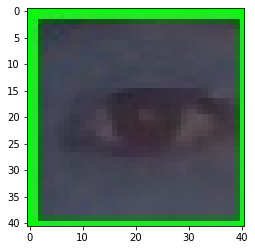

In [6]:
from matplotlib import pyplot as plt
img = cv2.imread("data_2.jpg")
plt.imshow(img)

In [ ]:
from test import *

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 4, 128)         0   